In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import openpyxl
import pandas as pd

xlsxFile = 'human_data_mining.xlsx'
sheetList = []

# openpyxl를 이용하여 시트명 가져오기

wb = openpyxl.load_workbook(xlsxFile)
for i in wb.sheetnames:
    sheetList.append(i)
    
print(sheetList)


# pandas를 이용하여 각 시트별 데이터 가져오기
xlsx = pd.ExcelFile(xlsxFile)
df = pd.read_excel(xlsx, '가격예측(나이키 x 사카이 LD와플 블루 멀티)(2)')
df

['리셀가능여부', '가격예측(조던1레트로하이OG블랙모카)', '가격예측(나이키 x 사카이 LD와플 블루 멀티)', '가격예측(나이키 x 피스마이너스원에어포스1로우파라노이드)', '가격예측(나이키 x 사카이 LD와플 블루 멀티)(2)', '가격예측(조던1레트로하이OG블랙모카)(2)']


,제품명,날짜,가격,발매가,평균기온,소비자물가데이터,검색량,종가
0,나이키 x 사카이 LD와플 블루 멀티,2020-02-18,720000,"179,000원",-4.1,0.9,0.000,100.0548
1,나이키 x 사카이 LD와플 블루 멀티,2020-02-19,720000,"179,000원",1.0,0.9,0.000,100.5060
2,나이키 x 사카이 LD와플 블루 멀티,2020-02-20,720000,"179,000원",4.6,0.9,0.000,100.5747
3,나이키 x 사카이 LD와플 블루 멀티,2020-02-21,720000,"179,000원",6.7,0.9,0.000,98.3381
4,나이키 x 사카이 LD와플 블루 멀티,2020-02-22,720000,"179,000원",4.0,0.9,0.000,NaN
...,...,...,...,...,...,...,...,...
768,나이키 x 사카이 LD와플 블루 멀티,2022-03-27,800000,"179,000원",8.1,4.1,0.000,NaN
769,나이키 x 사카이 LD와플 블루 멀티,2022-03-28,800000,"179,000원",8.2,4.1,3.125,134.8100
770,나이키 x 사카이 LD와플 블루 멀티,2022-03-29,800000,"179,000원",9.7,4.1,0.000,139.1400
771,나이키 x 사카이 LD와플 블루 멀티,2022-03-30,800000,"179,000원",10.8,4.1,0.000,138.5400


In [4]:
df['날짜'] = pd.to_datetime(df['날짜'], format='%Y%m%d')
df['종가'] = df['종가'].interpolate()

df['가격변동량'] = (df["가격"] - df['가격'].shift(1))
df['가격변동량'][0] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [5]:
df

,제품명,날짜,가격,발매가,평균기온,소비자물가데이터,검색량,종가,가격변동량
0,나이키 x 사카이 LD와플 블루 멀티,2020-02-18,720000,"179,000원",-4.1,0.9,0.000,100.054800,0.0
1,나이키 x 사카이 LD와플 블루 멀티,2020-02-19,720000,"179,000원",1.0,0.9,0.000,100.506000,0.0
2,나이키 x 사카이 LD와플 블루 멀티,2020-02-20,720000,"179,000원",4.6,0.9,0.000,100.574700,0.0
3,나이키 x 사카이 LD와플 블루 멀티,2020-02-21,720000,"179,000원",6.7,0.9,0.000,98.338100,0.0
4,나이키 x 사카이 LD와플 블루 멀티,2020-02-22,720000,"179,000원",4.0,0.9,0.000,96.919033,0.0
...,...,...,...,...,...,...,...,...,...
768,나이키 x 사카이 LD와플 블루 멀티,2022-03-27,800000,"179,000원",8.1,4.1,0.000,134.440000,0.0
769,나이키 x 사카이 LD와플 블루 멀티,2022-03-28,800000,"179,000원",8.2,4.1,3.125,134.810000,0.0
770,나이키 x 사카이 LD와플 블루 멀티,2022-03-29,800000,"179,000원",9.7,4.1,0.000,139.140000,0.0
771,나이키 x 사카이 LD와플 블루 멀티,2022-03-30,800000,"179,000원",10.8,4.1,0.000,138.540000,0.0


Text(0, 0.5, 'price')

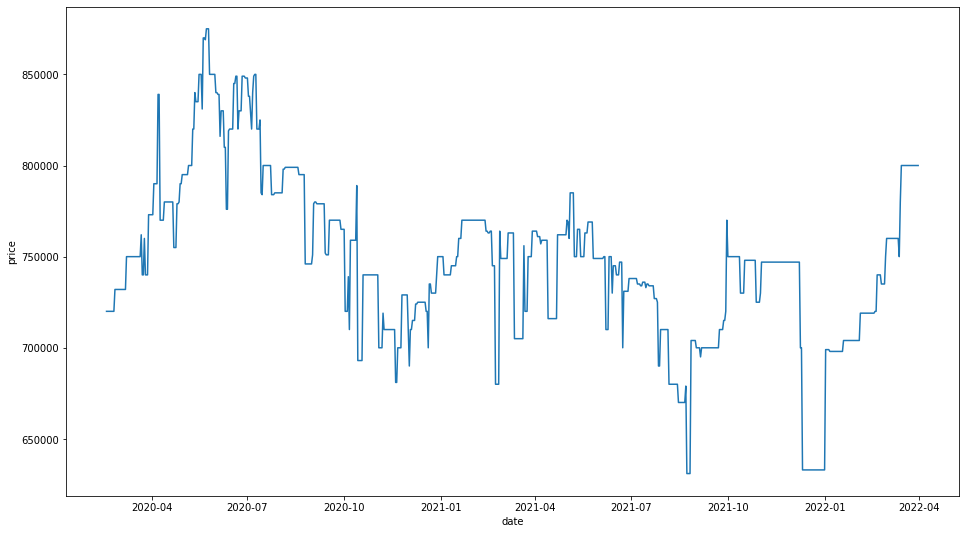

In [6]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=df['가격'], x=df['날짜'])
plt.xlabel('date')
plt.ylabel('price')

In [7]:
#data 정규화 
from sklearn.preprocessing import MinMaxScaler

df.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['가격','가격변동량','종가','검색량','평균기온','소비자물가데이터']
stocks_scaled = scaler.fit_transform(df[scale_cols])
stocks_scaled = pd.DataFrame(stocks_scaled)
stocks_scaled.columns = scale_cols

stocks_scaled

,가격,가격변동량,종가,검색량,평균기온,소비자물가데이터
0,0.364754,0.533333,0.332840,0.00000,0.231760,0.255814
1,0.364754,0.533333,0.336763,0.00000,0.341202,0.255814
2,0.364754,0.533333,0.337360,0.00000,0.418455,0.255814
3,0.364754,0.533333,0.317914,0.00000,0.463519,0.255814
4,0.364754,0.533333,0.305576,0.00000,0.405579,0.255814
...,...,...,...,...,...,...
768,0.692623,0.533333,0.631803,0.00000,0.493562,1.000000
769,0.692623,0.533333,0.635020,0.03125,0.495708,1.000000
770,0.692623,0.533333,0.672667,0.00000,0.527897,1.000000
771,0.692623,0.533333,0.667451,0.00000,0.551502,1.000000


In [8]:
TEST_SIZE = int(len(stocks_scaled)*0.2)
WINDOW_SIZE = 5

train = stocks_scaled[:-TEST_SIZE]
test = stocks_scaled[-TEST_SIZE:]

In [9]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [10]:
from sklearn.model_selection import train_test_split

feature_cols = ['가격','가격변동량','종가','검색량','소비자물가데이터']
label_cols = ['가격']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 20)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

((479, 20, 5), (120, 20, 5))

In [11]:
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature.shape, test_label.shape

((154, 5), (154, 1))

In [12]:
test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape

((134, 20, 5), (134, 1))

In [13]:
import tensorflow as tf
import keras

In [14]:
from tensorflow import keras

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import LSTM

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
from keras.layers import Dense, SimpleRNN, Activation
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [17]:
model_lstm = tf.keras.Sequential()
model_lstm.add(LSTM(128, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='sigmoid', 
               return_sequences=False)
          )
model_lstm.add(Dense(16, activation='relu'))
#model.add(Flatten())
model_lstm.add(Dense(1))

In [18]:
import os
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
loss = Huber()
optimizer = Adam(0.0005)
model_lstm.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model_lstm.fit(x_train, y_train, 
                                    epochs=200, 
                                    batch_size=5,
                                    validation_data=(x_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint])

Epoch 1/200
93/96 [============================>.] - ETA: 0s - loss: 0.0296 - mse: 0.0592
Epoch 1: val_loss improved from inf to 0.01298, saving model to model/tmp_checkpoint.h5
96/96 [==============================] - 4s 21ms/step - loss: 0.0291 - mse: 0.0582 - val_loss: 0.0130 - val_mse: 0.0260
Epoch 2/200
93/96 [============================>.] - ETA: 0s - loss: 0.0133 - mse: 0.0266
Epoch 2: val_loss improved from 0.01298 to 0.00982, saving model to model/tmp_checkpoint.h5
96/96 [==============================] - 2s 17ms/step - loss: 0.0132 - mse: 0.0263 - val_loss: 0.0098 - val_mse: 0.0196
Epoch 3/200
95/96 [============================>.] - ETA: 0s - loss: 0.0109 - mse: 0.0219
Epoch 3: val_loss improved from 0.00982 to 0.00880, saving model to model/tmp_checkpoint.h5
96/96 [==============================] - 2s 19ms/step - loss: 0.0109 - mse: 0.0218 - val_loss: 0.0088 - val_mse: 0.0176
Epoch 4/200
93/96 [============================>.] - ETA: 0s - loss: 0.0090 - mse: 0.0180
Epoch 4:

In [19]:
model_lstm.load_weights(filename)
pred_lstm = model_lstm.predict(test_feature)

pred_lstm.shape

(134, 1)

In [20]:
pred_lstm

array([[0.4535872 ],
       [0.45613515],
       [0.45451832],
       [0.45253012],
       [0.45369217],
       [0.45218366],
       [0.45212722],
       [0.45103705],
       [0.44894475],
       [0.4506349 ],
       [0.44885364],
       [0.45397544],
       [0.44864774],
       [0.45488748],
       [0.45421487],
       [0.45261857],
       [0.44994834],
       [0.45592004],
       [0.45168805],
       [0.45085347],
       [0.4523305 ],
       [0.45104793],
       [0.34326974],
       [0.33053857],
       [0.15955737],
       [0.13929991],
       [0.11677041],
       [0.10804907],
       [0.10117105],
       [0.09001824],
       [0.0879525 ],
       [0.08284119],
       [0.08148362],
       [0.08223186],
       [0.07770269],
       [0.07405885],
       [0.07358995],
       [0.07063542],
       [0.07073803],
       [0.06971833],
       [0.06618125],
       [0.06588786],
       [0.0657781 ],
       [0.06640851],
       [0.06850842],
       [0.06632879],
       [0.22600669],
       [0.241

In [24]:
import statsmodels.api as sm
mse,mae = model_lstm.evaluate(test_feature , test_label , batch_size=16)
print("lstm mse : ", mse)
print("lstm mae : ", mae)

from sklearn.metrics import mean_squared_error
def RMSE(y_test, y_predict):
    return np.sqrt(mean_squared_error(test_label, pred_lstm))
print('lstm RMSE : ', RMSE(test_label, pred_lstm))

from sklearn.metrics import r2_score
r2_y_predict = r2_score(test_label, pred_lstm)
print('lstm R2 : ', r2_y_predict)
from sklearn.metrics import median_absolute_error
MedAE_y_predict = median_absolute_error(test_label, pred_lstm)
print('lstm MedAE : ', MedAE_y_predict)

9/9 [==============================] - 0s 19ms/step - loss: 0.0015 - mse: 0.0030
lstm mse :  0.0014927891315892339
lstm mae :  0.0029855782631784678
lstm RMSE :  0.05464044371188109
lstm R2 :  0.927965571557293
lstm MedAE :  0.02316637410492195


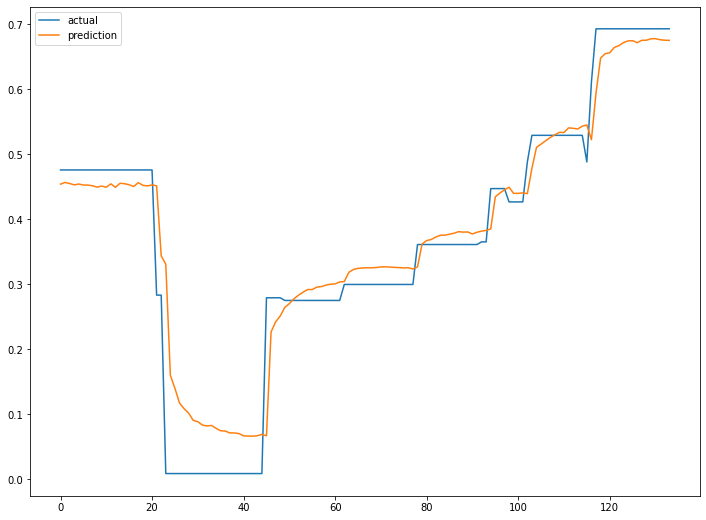

In [25]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred_lstm, label = 'prediction')
plt.legend()
plt.show()

In [26]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout

model_gru = Sequential()

model_gru.add(GRU(256,activation='tanh',input_shape=x_train[0].shape))

model_gru.add(Dense(1,activation='linear'))

model_gru.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 256)               201984    
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 202,241
Trainable params: 202,241
Non-trainable params: 0
_________________________________________________________________


In [27]:
from tensorflow.keras.callbacks import EarlyStopping 

model_gru.compile(loss='mse',optimizer='adam',metrics=['mse'])
early_stop = EarlyStopping(monitor='val_loss',patience=5)

model_path = 'model'
filename2 = os.path.join(model_path, 'tmp_checkpoint_gru.h5')
checkpoint = ModelCheckpoint(filename2, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

model_gru.fit(x_train,y_train,validation_data=(x_valid,y_valid),epochs=100,batch_size=16,callbacks=[early_stop])

Epoch 1/100
30/30 [==============================] - 5s 70ms/step - loss: 0.0407 - mse: 0.0407 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 2/100
30/30 [==============================] - 2s 51ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 3/100
30/30 [==============================] - 2s 51ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 4/100
30/30 [==============================] - 2s 50ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 5/100
30/30 [==============================] - 2s 51ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 6/100
30/30 [==============================] - 2s 81ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 7/100
30/30 [==============================] - 2s 65ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 8/100
30/30 [==============================] - 3s 85ms/step - loss: 0.

In [28]:
pred_gru = model_gru.predict(test_feature)
pred_gru

array([[0.44073945],
       [0.44071865],
       [0.4398011 ],
       [0.43359017],
       [0.43435043],
       [0.43395266],
       [0.43403798],
       [0.43588609],
       [0.43505394],
       [0.44507393],
       [0.45003766],
       [0.45999974],
       [0.45207313],
       [0.45704657],
       [0.45761108],
       [0.45431203],
       [0.44838494],
       [0.4572351 ],
       [0.45196763],
       [0.44761646],
       [0.45399004],
       [0.45345145],
       [0.30734703],
       [0.28281185],
       [0.07728235],
       [0.0400726 ],
       [0.03845707],
       [0.05048132],
       [0.05370486],
       [0.03563832],
       [0.03101913],
       [0.0267011 ],
       [0.02771512],
       [0.03274344],
       [0.03162787],
       [0.01807734],
       [0.01365248],
       [0.01035929],
       [0.01311391],
       [0.01429552],
       [0.00879356],
       [0.00882148],
       [0.0147425 ],
       [0.01750064],
       [0.02044788],
       [0.01662443],
       [0.21236081],
       [0.253

In [30]:
import statsmodels.api as sm
mse,mae = model_gru.evaluate(test_feature , test_label , batch_size=16)
print("gru mse : ", mse)
print("gru mae : ", mae)
from sklearn.metrics import mean_squared_error
def RMSE(y_test, y_predict):
    return np.sqrt(mean_squared_error(test_label, pred_gru))
print('gru RMSE : ', RMSE(test_label, pred_gru))

from sklearn.metrics import r2_score
r2_y_predict = r2_score(test_label, pred_gru)
print('gru R2 : ', r2_y_predict)

from sklearn.metrics import median_absolute_error
MedAE_y_predict = median_absolute_error(test_label, pred_gru)
print('gru MedAE : ', MedAE_y_predict)

9/9 [==============================] - 0s 13ms/step - loss: 0.0022 - mse: 0.0022
gru mse :  0.002181470161303878
gru mae :  0.002181470161303878
gru RMSE :  0.04670621258654434
gru R2 :  0.9473666535860226
gru MedAE :  0.019309507774525114


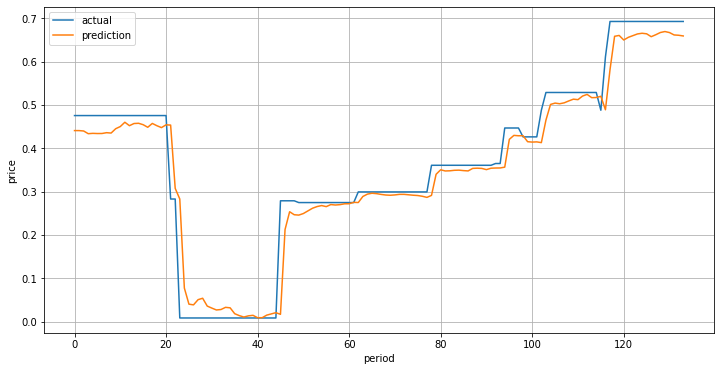

In [31]:
plt.figure(figsize=(12,6))
plt.ylabel('price')
plt.xlabel('period')
plt.plot(test_label,label='actual')
plt.plot(pred_gru,label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()